# Importing Laibraries

In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Importing **COCO** Names

In [2]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

# Preparing The Model

**model = torchvision.models.detection.ssd300_vgg16(pretrained=True)**

**torchvision.models.detection** module contains various object detection models.

**ssd300_vgg16** Refers to the SSD model with a VGG16 backbone. SSD is a popular object detection algorithm known for its efficiency and speed.

**pretrained=True** This argument specifies that the model should be initialized with weights pretrained on a large dataset. Pretrained models often have learned features that can be useful for various tasks, and they can be fine-tuned for specific applications.

**VGG16**  Visual Geometry Group 16, is a deep convolutional neural network architecture named after the research. This was introduced in the paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition".

In [3]:
model= torchvision.models.detection.ssd300_vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 174MB/s]


# Checking The Evaluation Of The Model

In [4]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

# Getting & Open Image

In [30]:
!wget '/content/2.jpg'

/content/2.jpg: Scheme missing.


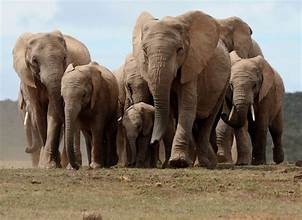

In [31]:
img=Image.open("/content/2.jpg")
img

# Converting Images From PIL To Tensor Format

In [32]:
transform=T.ToTensor()
img=transform(img)

In [33]:
img


tensor([[[0.9176, 0.9020, 0.8902,  ..., 0.8118, 0.8157, 0.8196],
         [0.9059, 0.8941, 0.8784,  ..., 0.8000, 0.8039, 0.8118],
         [0.8980, 0.8824, 0.8706,  ..., 0.7922, 0.7961, 0.8000],
         ...,
         [0.6706, 0.6275, 0.6314,  ..., 0.6392, 0.6510, 0.6392],
         [0.6706, 0.6353, 0.6471,  ..., 0.6549, 0.6627, 0.6549],
         [0.6627, 0.6314, 0.6549,  ..., 0.6667, 0.6706, 0.6588]],

        [[0.9608, 0.9451, 0.9333,  ..., 0.8784, 0.8824, 0.8863],
         [0.9490, 0.9373, 0.9216,  ..., 0.8667, 0.8706, 0.8784],
         [0.9412, 0.9255, 0.9137,  ..., 0.8588, 0.8627, 0.8667],
         ...,
         [0.5961, 0.5529, 0.5569,  ..., 0.5373, 0.5490, 0.5373],
         [0.5961, 0.5608, 0.5725,  ..., 0.5451, 0.5529, 0.5451],
         [0.5882, 0.5569, 0.5804,  ..., 0.5490, 0.5608, 0.5490]],

        [[0.9765, 0.9608, 0.9490,  ..., 0.9490, 0.9529, 0.9569],
         [0.9647, 0.9529, 0.9373,  ..., 0.9373, 0.9412, 0.9490],
         [0.9569, 0.9412, 0.9294,  ..., 0.9216, 0.9255, 0.

# Prediction Of The Model

In [34]:
with torch.no_grad():
  prediction=model([img])

In [35]:
prediction

[{'boxes': tensor([[217.5535,  53.2790, 285.1380, 169.2737],
          [ 10.3835,  23.6527,  89.8715, 165.3643],
          [ 59.5937,  60.8434, 126.8034, 169.7741],
          [122.2652,   6.3377, 248.2858, 166.2169],
          [117.3575, 101.5618, 164.1266, 172.2435],
          [116.1569,  42.8767, 172.6022, 162.0779],
          [172.6361,  27.1611, 271.5336, 167.4869],
          [218.7327, 103.1956, 252.1045, 166.8855],
          [121.5370,  54.0338, 149.4103, 122.0876],
          [ 23.1330, 103.7740,  50.7112, 162.3041],
          [151.7021, 101.3178, 179.0935, 167.0678],
          [ 14.7354,  95.3771,  41.5857, 154.2462],
          [139.5396,  54.6059, 164.1290, 127.2674],
          [123.2345,  88.1255, 152.1229, 157.5824],
          [252.0810,  99.4943, 281.9702, 165.1793],
          [110.2522,  56.4589, 132.9292, 124.9311],
          [139.5349,  50.4135, 209.8492, 167.5647],
          [202.1206,  13.7752, 262.7649,  67.5410],
          [139.3735,  85.0388, 164.5780, 153.7536],
   

# Checking The Model Output

In [36]:
type(prediction)

list

In [37]:
len(prediction)

1

In [38]:
len(prediction[0])

3

In [39]:
type(prediction[0])

dict

In [40]:
prediction[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

# Printing Every Key & Their Items Seperately

In [41]:
bounding_boxes,scores,labels=prediction[0]['boxes'],prediction[0]['scores'],prediction[0]['labels']

In [42]:
bounding_boxes

tensor([[217.5535,  53.2790, 285.1380, 169.2737],
        [ 10.3835,  23.6527,  89.8715, 165.3643],
        [ 59.5937,  60.8434, 126.8034, 169.7741],
        [122.2652,   6.3377, 248.2858, 166.2169],
        [117.3575, 101.5618, 164.1266, 172.2435],
        [116.1569,  42.8767, 172.6022, 162.0779],
        [172.6361,  27.1611, 271.5336, 167.4869],
        [218.7327, 103.1956, 252.1045, 166.8855],
        [121.5370,  54.0338, 149.4103, 122.0876],
        [ 23.1330, 103.7740,  50.7112, 162.3041],
        [151.7021, 101.3178, 179.0935, 167.0678],
        [ 14.7354,  95.3771,  41.5857, 154.2462],
        [139.5396,  54.6059, 164.1290, 127.2674],
        [123.2345,  88.1255, 152.1229, 157.5824],
        [252.0810,  99.4943, 281.9702, 165.1793],
        [110.2522,  56.4589, 132.9292, 124.9311],
        [139.5349,  50.4135, 209.8492, 167.5647],
        [202.1206,  13.7752, 262.7649,  67.5410],
        [139.3735,  85.0388, 164.5780, 153.7536],
        [ 42.0155, 104.7821,  68.5276, 164.9306],


In [43]:
scores

tensor([0.9832, 0.9541, 0.9233, 0.8195, 0.5587, 0.1608, 0.1139, 0.1105, 0.0985,
        0.0786, 0.0732, 0.0698, 0.0670, 0.0669, 0.0647, 0.0629, 0.0626, 0.0602,
        0.0592, 0.0581, 0.0573, 0.0566, 0.0565, 0.0564, 0.0562, 0.0557, 0.0545,
        0.0543, 0.0530, 0.0521, 0.0518, 0.0518, 0.0517, 0.0516, 0.0506, 0.0506,
        0.0498, 0.0491, 0.0482, 0.0473, 0.0470, 0.0468, 0.0463, 0.0461, 0.0459,
        0.0457, 0.0453, 0.0451, 0.0448, 0.0444, 0.0441, 0.0439, 0.0439, 0.0430,
        0.0428, 0.0421, 0.0420, 0.0418, 0.0418, 0.0417, 0.0415, 0.0414, 0.0355,
        0.0204, 0.0181, 0.0181, 0.0178, 0.0175, 0.0172, 0.0170, 0.0162, 0.0154,
        0.0152, 0.0150, 0.0147, 0.0145, 0.0140, 0.0138, 0.0137, 0.0137, 0.0136,
        0.0135, 0.0133, 0.0132, 0.0131, 0.0130, 0.0130, 0.0130, 0.0130, 0.0129,
        0.0127, 0.0127, 0.0127, 0.0126, 0.0125, 0.0125, 0.0125, 0.0124, 0.0124,
        0.0124, 0.0123, 0.0122, 0.0122, 0.0122, 0.0121, 0.0120, 0.0120, 0.0119,
        0.0119, 0.0118, 0.0116, 0.0116, 

In [44]:
labels

tensor([22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 31, 16,  1, 31, 31, 27, 31,  1, 16,  1,
         1, 16, 16,  1, 31,  1,  1,  1, 16,  1,  1, 16,  1,  1,  1,  1,  1, 16,
        62, 31,  1,  1, 16, 31,  1, 16, 16,  1, 15, 84,  1,  1,  1,  1,  1, 16,
        15, 16, 15,  1,  1,  1,  1,  1,  1, 31,  1,  1,  1,  1, 15,  1, 31,  1,
         1,  1, 32,  1,  1, 62, 16,  1,  1, 31, 15,  1, 16, 84,  1, 31, 31, 31,
         1,  1, 21, 85, 16,  1,  1,  1,  1, 27, 31,  1,  1,  1,  1,  1, 31, 16])

# Checking Total Number of Objects Detected in The Image

In [45]:
num=torch.argwhere(scores>0.5).shape[0]
num

5

# Printing All Onjects That Are Detected In Image

In [46]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [50]:
pic=cv2.imread("/content/2.jpg")
for i in range(num):
  # extracting bounding boxes values
  x1,y1,x2,y2=bounding_boxes[i].numpy().astype('int') # Converting the boxes values from tensors to numpy and also their types
  # plotting the rectangle with the help of boxes values and giving color
  pic=cv2.rectangle(pic,(x1,y1),(x2,y2),(255,0,0))
  # Putting text on bounding box
  class_names=coco_names[labels.numpy()[i]-1]
  pic=cv2.putText(pic,class_names,(x1,y1-10),font,0.5,(0,0,255),1,cv2.LINE_AA)

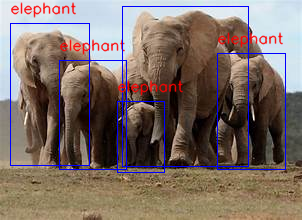

In [51]:
cv2_imshow(pic)